Creating a jupyter notebook file to run the data processing/feature engineering commands

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [395]:
product_catalog_df = pd.read_csv("C:\\data\\Work\\data\\product_catalog_new.csv")

In [396]:
product_catalog_df

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Large,Ergonomic,Member,2129.87,Credit Card,Yes,219,19.09,131.49,10,Neutral
96,97,Garden Lounge Bench,Outdoor Furniture,Wood,Medium,Waterproof,Member,3011.10,Credit Card,Yes,806,7.79,144.57,10,Positive
97,98,Queen Bed with Storage,Bedroom Furniture,Wood,Medium,Minimalist,Member,999.36,Credit Card,No,71,17.95,149.06,8,Positive
98,99,Compact Shoe Rack,Storage & Organization,Plastic,Small,Durable,Normal,3186.13,Cash on Delivery,Yes,749,2.73,116.02,5,Positive


In [397]:
print("Unique values in 'Sales Volume':", product_catalog_df["Sales Volume"].unique())

Unique values in 'Sales Volume': [217 698 973 201 932 701 319 120 679 979 706 452 177 703 198 135 761 751
 744 300  59  75 468 163 574 494 352  15 628 287 850  20 594 159 968 448
 652 418 642 676  11 271 583 684 801  48 111 206 364 454 125 430 527 660
 385 685 776 592  73 987 957  26 975 998 933 702 205 262 276 938 157 877
  91 949 840 467 261 423 408 498 804 659 245 535 180 806 727 355 637 219
  71 749  45]


In [398]:
product_catalog_df.head()

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive


In [399]:
product_catalog_df.describe

<bound method NDFrame.describe of     Product ID            Product Name                Category Material  \
0            1    Kitchen Pantry Shelf        Kitchen & Dining     Wood   
1            2   Ottoman Storage Bench  Storage & Organization   Fabric   
2            3        Rustic Bookshelf  Storage & Organization     Wood   
3            4         Rattan Armchair         Sofas & Seating   Velvet   
4            5      Glass Dining Table                  Tables    Glass   
..         ...                     ...                     ...      ...   
95          96    Kitchen Pantry Shelf        Kitchen & Dining     Wood   
96          97     Garden Lounge Bench       Outdoor Furniture     Wood   
97          98  Queen Bed with Storage       Bedroom Furniture     Wood   
98          99       Compact Shoe Rack  Storage & Organization  Plastic   
99         100    Large Wooden Dresser       Bedroom Furniture     Wood   

      Size Special_features Customer Type    Price      Payment T

In [400]:
column_list=(list(product_catalog_df.columns))
print(column_list)

['Product ID', 'Product Name', 'Category', 'Material', 'Size', 'Special_features', 'Customer Type', 'Price', 'Payment Type', 'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost', 'Seasonality Score', 'Implicit Feedback']


In [401]:
#Observing the different types of data

print("=============================================")
print("Data types of the columns in the data frame:", product_catalog_df.dtypes)
print("=============================================")
print("Shape of the data frame:", product_catalog_df.shape)
print("=============================================")
print("Information about the data frame:", product_catalog_df.info())
product_catalog_df.head()

Data types of the columns in the data frame: Product ID             int64
Product Name          object
Category              object
Material              object
Size                  object
Special_features      object
Customer Type         object
Price                float64
Payment Type          object
Sellable Online       object
Sales Volume           int64
Return Rate          float64
Storage Cost         float64
Seasonality Score      int64
Implicit Feedback     object
dtype: object
Shape of the data frame: (100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         100 non-null    int64  
 1   Product Name       100 non-null    object 
 2   Category           100 non-null    object 
 3   Material           100 non-null    object 
 4   Size               100 non-null    object 
 5   Special_features   100 non

,Product ID,Product Name,Category,Material,Size,Special_features,Customer Type,Price,Payment Type,Sellable Online,Sales Volume,Return Rate,Storage Cost,Seasonality Score,Implicit Feedback
0,1,Kitchen Pantry Shelf,Kitchen & Dining,Wood,Medium,Durable,Member,2530.23,Debit Card,Yes,217,15.11,171.65,4,Positive
1,2,Ottoman Storage Bench,Storage & Organization,Fabric,Large,Foldable,Normal,1784.65,Debit Card,Yes,698,9.15,143.67,3,Positive
2,3,Rustic Bookshelf,Storage & Organization,Wood,Large,Durable,Member,1325.18,Credit Card,Yes,973,15.78,32.06,4,Neutral
3,4,Rattan Armchair,Sofas & Seating,Velvet,Medium,Durable,Member,1789.55,Cash on Delivery,No,201,6.42,171.89,3,Negative
4,5,Glass Dining Table,Tables,Glass,Large,Durable,Normal,1915.92,Debit Card,No,932,16.26,118.37,7,Positive


In [402]:
#Checking missing values
print(product_catalog_df.isnull().sum())

Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [403]:
print("Product Catalog Duplicates:", product_catalog_df.duplicated().sum())

Product Catalog Duplicates: 0



--- Checking Outliers (Boxplot) ---


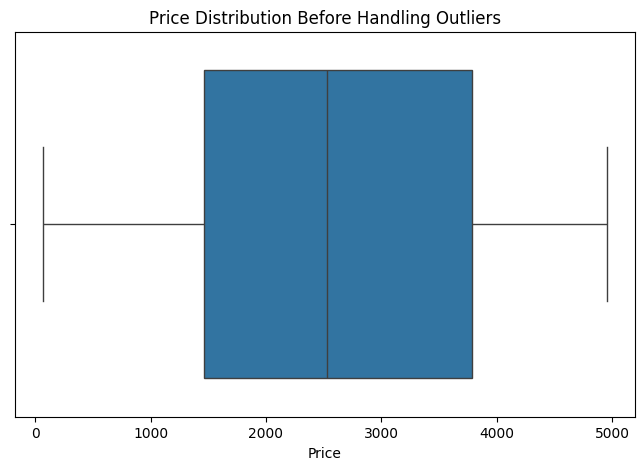

In [404]:
print("\n--- Checking Outliers (Boxplot) ---")
plt.figure(figsize=(8,5))
sns.boxplot(x=product_catalog_df["Price"])
plt.title("Price Distribution Before Handling Outliers")
plt.show()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\1574029216.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)


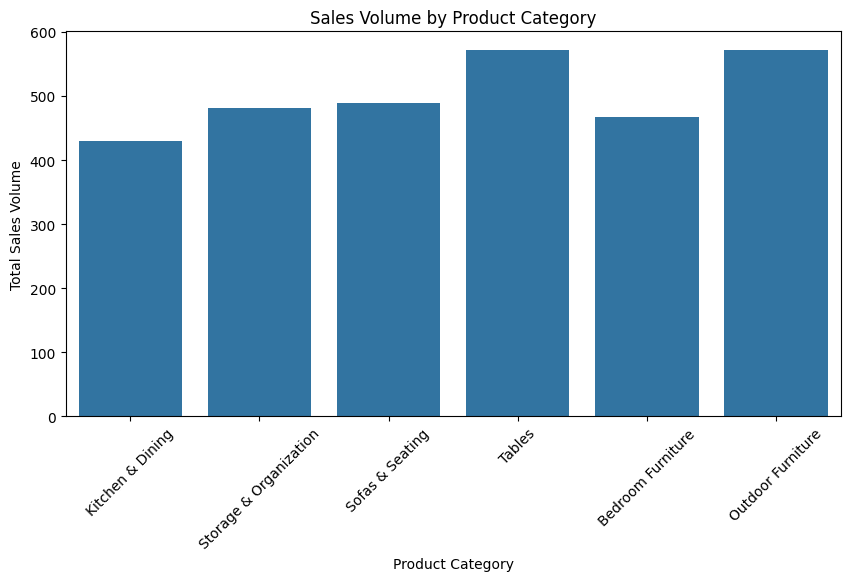

In [405]:
#Bar plot for products vs sales
plt.figure(figsize=(10,5))
sns.barplot(x=product_catalog_df["Category"], y=product_catalog_df["Sales Volume"], ci=None)
plt.xticks(rotation=45)
plt.title("Sales Volume by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Volume")
plt.show()


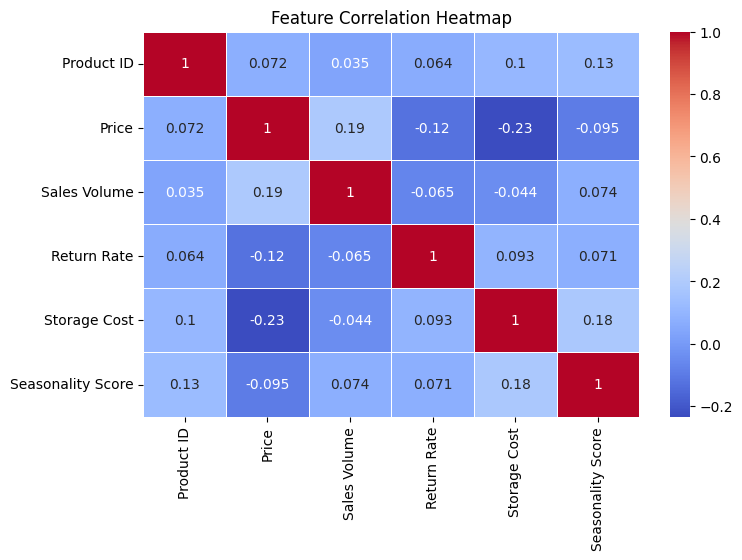

In [406]:
# Select only numerical columns for correlation
numeric_data = product_catalog_df.select_dtypes(include=["number"])

# Generate heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



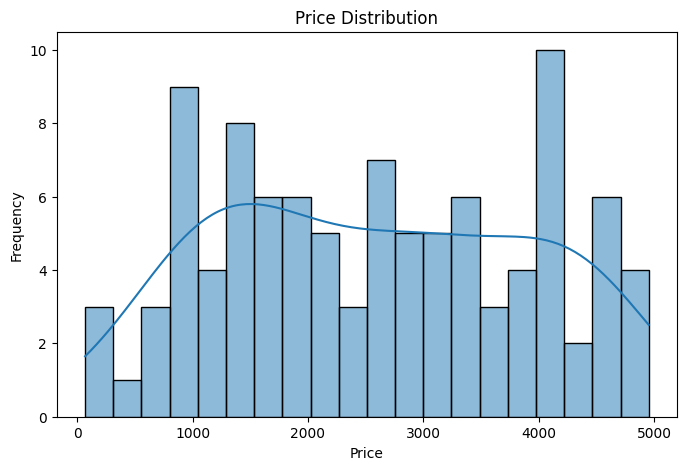

In [407]:
#return rate
plt.figure(figsize=(8,5))
sns.histplot(product_catalog_df["Price"], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Text(0, 0.5, '')

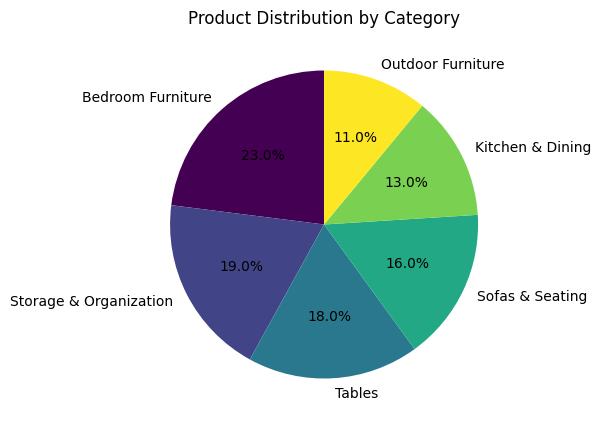

In [408]:
#product distribution
plt.figure(figsize=(8,5))
product_catalog_df["Category"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Product Distribution by Category")
plt.ylabel("") 


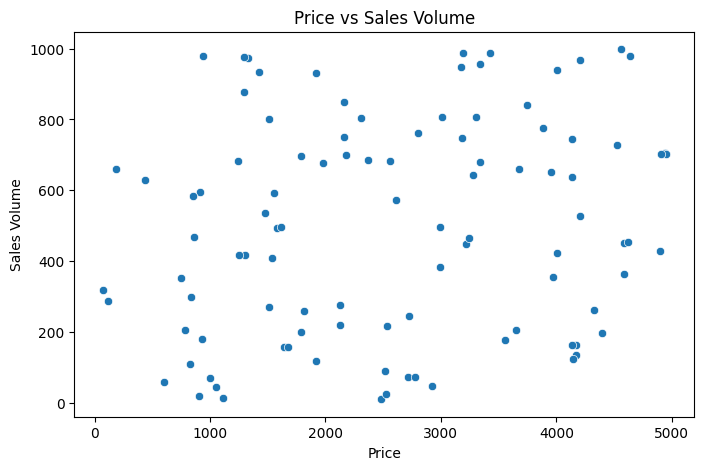

In [409]:
#scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=product_catalog_df["Price"], y=product_catalog_df["Sales Volume"])
plt.title("Price vs Sales Volume")
plt.xlabel("Price")
plt.ylabel("Sales Volume")
plt.show()


In [410]:
print((product_catalog_df == "").sum())



Product ID           0
Product Name         0
Category             0
Material             0
Size                 0
Special_features     0
Customer Type        0
Price                0
Payment Type         0
Sellable Online      0
Sales Volume         0
Return Rate          0
Storage Cost         0
Seasonality Score    0
Implicit Feedback    0
dtype: int64


In [411]:
print("Unique values in 'Sales Volume':", product_catalog_df["Sales Volume"].unique())

Unique values in 'Sales Volume': [217 698 973 201 932 701 319 120 679 979 706 452 177 703 198 135 761 751
 744 300  59  75 468 163 574 494 352  15 628 287 850  20 594 159 968 448
 652 418 642 676  11 271 583 684 801  48 111 206 364 454 125 430 527 660
 385 685 776 592  73 987 957  26 975 998 933 702 205 262 276 938 157 877
  91 949 840 467 261 423 408 498 804 659 245 535 180 806 727 355 637 219
  71 749  45]


In [412]:
#Standardizing categorical data
categorical_cols = [ "Payment Type"]
for col in categorical_cols:
    if col in product_catalog_df.columns:
        product_catalog_df[col] = product_catalog_df[col].str.lower().str.strip()


In [413]:
#map sellable online to 0 and 1
if "Sellable Online" in product_catalog_df.columns:
    product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int)


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\3044114595.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"Yes": 1, "No": 0}).astype(int)


In [433]:
print("\n🔍 Unique values in 'Sellable Online' before mapping:")
print(product_catalog_df["Sellable Online"].unique())



🔍 Unique values in 'Sellable Online' before mapping:
[1 0]


In [434]:
print(product_catalog_df[["Sellable Online", "Sales Volume", "Online Sellability Score"]].head(20))


KeyError: "['Online Sellability Score'] not in index"

In [416]:
# Scaling only selected numerical columns
scaled_cols = ["Price", "Return Rate", "Storage Cost"]
if "Seasonality Score" in product_catalog_df.columns:  # Checking if it exists
    scaled_cols.append("Seasonality Score")

scaler = StandardScaler()
product_catalog_df[scaled_cols] = scaler.fit_transform(product_catalog_df[scaled_cols])


In [418]:
#Convert data types
convert_types = {
    "Price": float,
    "Sales Volume": int, 
    "Return Rate": float,
    "Storage Cost": float
}

for col, dtype in convert_types.items():
    if col in product_catalog_df.columns:
        product_catalog_df[col] = pd.to_numeric(product_catalog_df[col], errors='coerce').astype(dtype)

In [419]:
print("Unique values in 'Sales Volume':", product_catalog_df["Sales Volume"].unique())

Unique values in 'Sales Volume': [217 698 973 201 932 701 319 120 679 979 706 452 177 703 198 135 761 751
 744 300  59  75 468 163 574 494 352  15 628 287 850  20 594 159 968 448
 652 418 642 676  11 271 583 684 801  48 111 206 364 454 125 430 527 660
 385 685 776 592  73 987 957  26 975 998 933 702 205 262 276 938 157 877
  91 949 840 467 261 423 408 498 804 659 245 535 180 806 727 355 637 219
  71 749  45]


In [435]:
product_catalog_df["Online_Sellability_Score"] = (
    (product_catalog_df["Sellable Online"] * product_catalog_df["Sales Volume"]) / (product_catalog_df["Sales Volume"].max() + 1)
)



In [437]:
print(product_catalog_df[["Sellable Online", "Sales Volume", "Online_Sellability_Score"]].head(20))


    Sellable Online  Sales Volume  Online_Sellability_Score
0                 1           217                  0.217217
1                 1           698                  0.698699
2                 1           973                  0.973974
3                 0           201                  0.000000
4                 0           932                  0.000000
5                 1           701                  0.701702
6                 1           319                  0.319319
7                 1           120                  0.120120
8                 0           679                  0.000000
9                 1           979                  0.979980
10                1           706                  0.706707
11                0           452                  0.000000
12                1           177                  0.177177
13                1           703                  0.703704
14                1           198                  0.198198
15                1           979       

In [427]:
print(product_catalog_df["Online_Sellability_Rate"].isnull().sum())


0


In [423]:
print((product_catalog_df["Online_Sellability_Rate"] < 0).sum())


0


In [438]:
product_catalog_df["Online_Sellability_Rate"] = product_catalog_df["Online_Sellability_Score"] / (product_catalog_df["Sales Volume"] + 1)


In [428]:
print(product_catalog_df["Sales Volume"].nunique())

93


In [429]:
print(product_catalog_df["Sellable Online"].unique())


[1 0]


In [228]:
#Creating new features for the recommendation system
product_catalog_df["Sales_to_Return_Ratio"] = product_catalog_df["Sales Volume"] / (product_catalog_df["Return Rate"] + 1)  # Adding 1 to avoid division by zero


In [229]:

product_catalog_df["Revenue_Per_Product"] = product_catalog_df["Sales Volume"] * product_catalog_df["Price"]


In [230]:
product_catalog_df["Storage_Efficiency_Score"] = product_catalog_df["Revenue_Per_Product"] / (product_catalog_df["Storage Cost"] + 1)  # Adding 1 to avoid division by zero


In [231]:
threshold_sales = product_catalog_df["Sales Volume"].quantile(0.75)
product_catalog_df["High_Demand_Indicator"] = np.where(product_catalog_df["Sales Volume"] >= threshold_sales, 1, 0)


In [232]:
# Convert Implicit Feedback to numeric values
feedback_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
product_catalog_df["Implicit_Feedback_Score"] = product_catalog_df["Implicit Feedback"].map(feedback_mapping)

# Define Top Rated based on positive implicit feedback
product_catalog_df["Top_Rated"] = np.where(product_catalog_df["Implicit_Feedback_Score"] > 0, 1, 0)


In [233]:
# Likelihood of Purchase
total_sales = product_catalog_df["Sales Volume"].sum()
product_catalog_df["Likelihood_of_Purchase"] = product_catalog_df["Sales Volume"] / (total_sales + 1)  # Adding 1 to avoid division by zero


In [234]:
#Expert Judgment Score 
product_catalog_df["Expert_Judgment_Score"] = (
    (product_catalog_df["High_Demand_Indicator"] * 1) +
    (product_catalog_df["Top_Rated"] * 1) +
    (product_catalog_df["Revenue_Per_Product"] > product_catalog_df["Revenue_Per_Product"].median()) * 1
)


In [235]:
numerical_features = ["Sales_to_Return_Ratio", "Revenue_Per_Product", "Storage_Efficiency_Score",
                      "Online_Sellability_Score", "High_Demand_Indicator", "Top_Rated"]

In [237]:
print(product_catalog_df.dtypes)


Product ID                    int64
Product Name                 object
Category                     object
Material                     object
Size                         object
Special_features             object
Customer Type                object
Price                       float64
Payment Type                 object
Sellable Online              object
Sales Volume                  int64
Return Rate                 float64
Storage Cost                float64
Seasonality Score           float64
Implicit Feedback            object
Sales_to_Return_Ratio       float64
Revenue_Per_Product         float64
Storage_Efficiency_Score    float64
High_Demand_Indicator         int64
Implicit_Feedback_Score       int64
Top_Rated                     int64
Likelihood_of_Purchase      float64
Expert_Judgment_Score         int64
dtype: object


In [238]:
print(product_catalog_df["Sellable Online"].unique())


['yes' 'no']


In [239]:
# Convert to lowercase and strip spaces first
product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].astype(str).str.strip().str.lower()

# Use replace instead of map
product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"yes": 1, "no": 0})


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\2854508848.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].replace({"yes": 1, "no": 0})


In [240]:
product_catalog_df["Online_Sellability_Score"] = (
    product_catalog_df["Sellable Online"].astype(int) * product_catalog_df["Sales Volume"].astype(float)
)


In [420]:
print("\n🔍 Unique values in 'Sellable Online':")
print(product_catalog_df["Sellable Online"].unique())

print("\n🔍 Unique values in 'Sales Volume':")
print(product_catalog_df["Sales Volume"].unique())


🔍 Unique values in 'Sellable Online':
[1 0]

🔍 Unique values in 'Sales Volume':
[217 698 973 201 932 701 319 120 679 979 706 452 177 703 198 135 761 751
 744 300  59  75 468 163 574 494 352  15 628 287 850  20 594 159 968 448
 652 418 642 676  11 271 583 684 801  48 111 206 364 454 125 430 527 660
 385 685 776 592  73 987 957  26 975 998 933 702 205 262 276 938 157 877
  91 949 840 467 261 423 408 498 804 659 245 535 180 806 727 355 637 219
  71 749  45]


In [244]:
product_catalog_df["Online_Sellability_Score"] = (
    product_catalog_df["Sellable Online"].astype(int) * product_catalog_df["Sales Volume"].astype(float)
)


In [257]:
print("🔍 Unique values in 'Sales Volume':", product_catalog_df["Sales Volume"].unique())


🔍 Unique values in 'Sales Volume': [-0.93888445  0.66419467  1.580716   -0.99220933  1.44407101  0.67419309
 -0.59893836 -1.26216652  0.60087138  1.60071283  0.69085711 -0.15567531
 -1.07219664  0.6808587  -1.00220774 -1.21217445  0.87416138  0.84083333
  0.8175037  -0.66226165 -1.46546761 -1.41214274 -0.10235044 -1.11885591
  0.25092688 -0.01569751 -0.4889558  -1.61211102  0.43089834 -0.70558811
  1.17078101 -1.595447    0.31758297 -1.13218713  1.56405198 -0.16900653
  0.51088565 -0.26899068  0.4775576   0.59087297 -1.62544224 -0.75891299
  0.28092212  0.61753541  1.00747357 -1.50212847 -1.29216176 -0.9755453
 -0.44896214 -0.1490097  -1.24550249 -0.22899702  0.09428505  0.53754809
 -0.37897324  0.62086821  0.92415345  0.31091736 -1.41880834  1.62737527
  1.52739113 -1.57545017  1.58738161  1.66403612  1.44740381  0.67752589
 -0.97887811 -0.78890823 -0.74224896  1.46406783 -1.13885274  1.26076674
 -1.35881786  1.50072869  1.13745296 -0.10568324 -0.79224104 -0.25232665
 -0.30231873 -0.0

In [205]:
print(product_catalog_df.columns)


Index(['Product ID', 'Product Name', 'Category', 'Material', 'Size',
       'Special_features', 'Customer Type', 'Price', 'Payment Type',
       'Sellable Online', 'Sales Volume', 'Return Rate', 'Storage Cost',
       'Seasonality Score', 'Implicit Feedback', 'Sales_to_Return_Ratio',
       'Revenue_Per_Product', 'Storage_Efficiency_Score',
       'High_Demand_Indicator', 'Implicit_Feedback_Score', 'Top_Rated',
       'Likelihood_of_Purchase', 'Expert_Judgment_Score',
       'Online_Sellability_Score'],
      dtype='object')


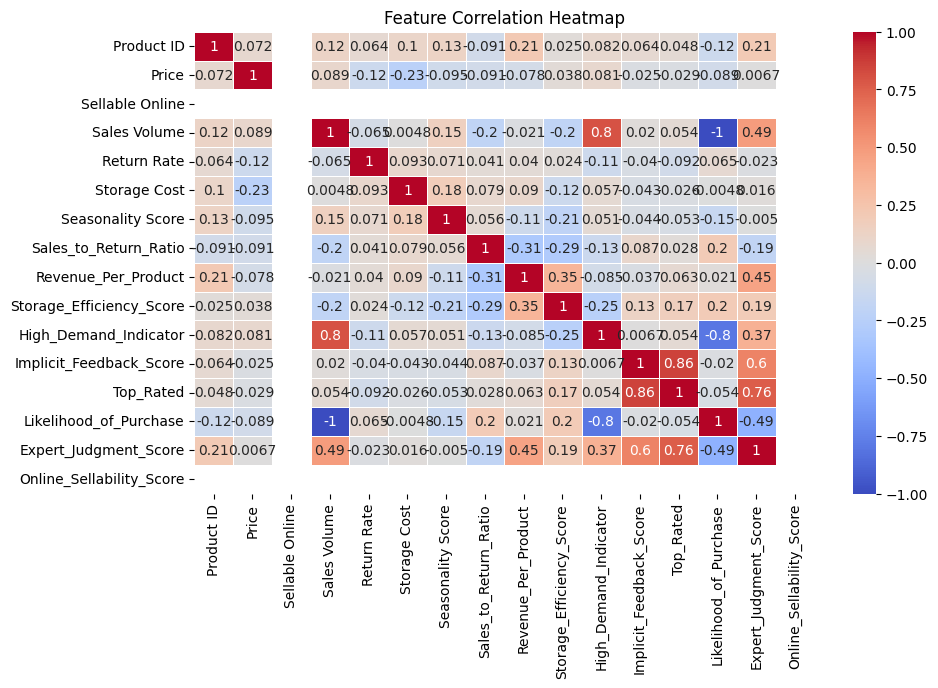

In [206]:
# Select only numeric features
numeric_product_catalog_df = product_catalog_df.select_dtypes(include=[np.number])

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_product_catalog_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [194]:
print("\n🔍 Unique values in 'Sellable Online':")
print(product_catalog_df["Sellable Online"].unique())

print("\n🔍 Unique values in 'Sales Volume':")
print(product_catalog_df["Sales Volume"].unique())


🔍 Unique values in 'Sellable Online':
['yes' 'no']

🔍 Unique values in 'Sales Volume':
[ 0  1 -1]


In [137]:
# Ensure 'Sellable Online' is correctly mapped
product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].astype(str).str.strip()
product_catalog_df["Sellable Online"] = product_catalog_df["Sellable Online"].map({"Yes": 1, "No": 0}).fillna(0).astype(int)

print("\n✅ Fixed 'Sellable Online' Values:")
print(product_catalog_df["Sellable Online"].value_counts())



✅ Fixed 'Sellable Online' Values:
Sellable Online
0    100
Name: count, dtype: int64


In [138]:
print("\n🔍 Unique values in 'Sales Volume':")
print(product_catalog_df["Sales Volume"].unique())



🔍 Unique values in 'Sales Volume':
[ 0.  1. -1.]


In [139]:
# Ensure 'Sales Volume' is properly assigned and not all zeros
product_catalog_df["Sales Volume"] = product_catalog_df["Sales Volume"].replace(0, np.nan).fillna(1).astype(float)


In [143]:
print("\n📌 Data type of 'Online_Sellability_Score':", product_catalog_df["Online_Sellability_Score"].dtype)



📌 Data type of 'Online_Sellability_Score': float64


In [144]:
print("\n🛑 Missing values in 'Online_Sellability_Score':", product_catalog_df["Online_Sellability_Score"].isnull().sum())



🛑 Missing values in 'Online_Sellability_Score': 0


In [136]:
print("\n🔍 Unique values in 'Sellable Online':")
print(product_catalog_df["Sellable Online"].unique())



🔍 Unique values in 'Sellable Online':
[0]


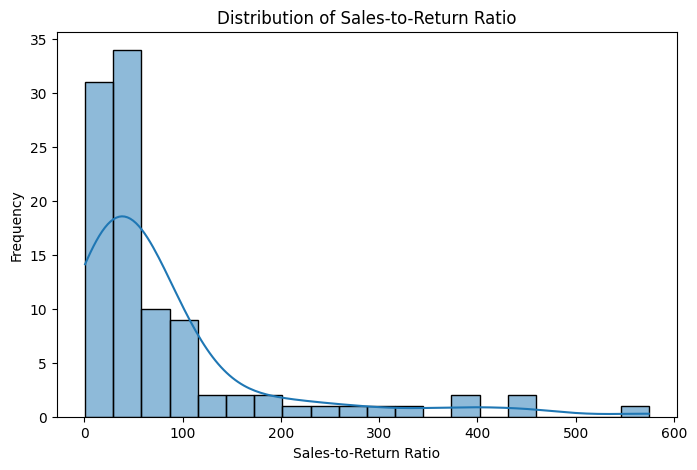

In [44]:
#Histogram
plt.figure(figsize=(8, 5))
sns.histplot(product_catalog_df["Sales_to_Return_Ratio"], bins=20, kde=True)
plt.title("Distribution of Sales-to-Return Ratio")
plt.xlabel("Sales-to-Return Ratio")
plt.ylabel("Frequency")
plt.show()

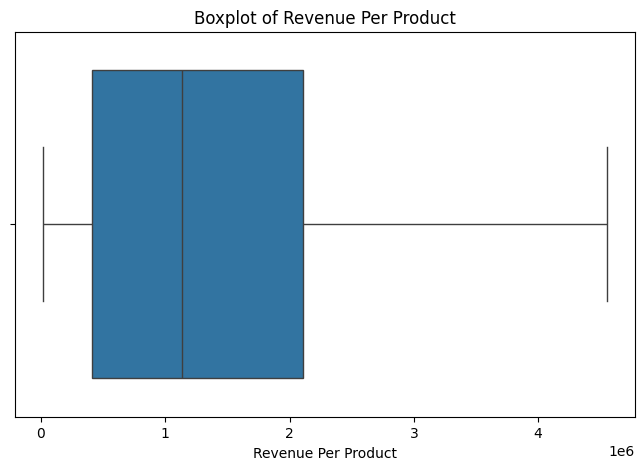

In [45]:
#Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=product_catalog_df["Revenue_Per_Product"])
plt.title("Boxplot of Revenue Per Product")
plt.xlabel("Revenue Per Product")
plt.show()


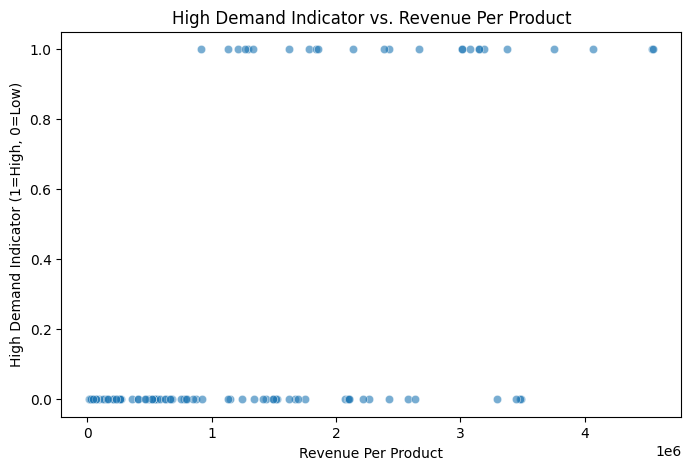

In [46]:
#Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=product_catalog_df["Revenue_Per_Product"], y=product_catalog_df["High_Demand_Indicator"], alpha=0.6)
plt.title("High Demand Indicator vs. Revenue Per Product")
plt.xlabel("Revenue Per Product")
plt.ylabel("High Demand Indicator (1=High, 0=Low)")
plt.show()

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_2572\3772209360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")


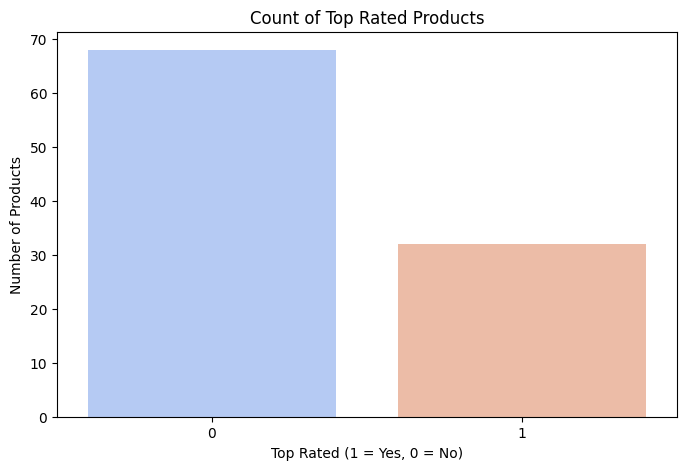

In [47]:
#Bar chart for top rated products
plt.figure(figsize=(8, 5))
sns.countplot(x=product_catalog_df["Top_Rated"], palette="coolwarm")
plt.title("Count of Top Rated Products")
plt.xlabel("Top Rated (1 = Yes, 0 = No)")
plt.ylabel("Number of Products")
plt.show()

In [50]:
#Loading the dataset
file_path = "C:/data/Work/Data_processing/Processed_product_catalog.csv"
product_catalog_df = pd.read_csv(file_path)